# Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Data Load

In [2]:
import numpy as np
import pandas as pd

train = pd.read_csv("train.csv")

In [3]:
train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


## Data shuffle

In [5]:
from sklearn.utils import shuffle
train = shuffle(train)

In [6]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
4525,0.283203,-0.047024,-0.168986,0.384949,0.176898,-0.310332,0.381757,0.122611,-0.332984,0.465563,...,-0.932568,-0.034924,0.558036,0.258975,-0.854858,-0.784330,0.222960,-0.066506,22,WALKING_DOWNSTAIRS
1446,0.256904,-0.036623,-0.133856,0.201409,-0.154142,0.344183,0.092771,-0.182114,0.291899,0.586004,...,-0.338095,0.017986,-0.475545,0.942947,-0.567147,-0.665156,0.178975,0.243362,7,WALKING_DOWNSTAIRS
5995,0.291316,-0.001065,-0.072461,-0.336609,-0.279162,-0.303323,-0.381421,-0.253026,-0.337381,0.074430,...,-0.698254,-0.044663,-0.551806,-0.680774,0.161405,-0.857202,0.192929,0.046716,27,WALKING
4222,0.276116,-0.010909,-0.102886,-0.992196,-0.982169,-0.981127,-0.992838,-0.981366,-0.979864,-0.931924,...,-0.906098,-0.177275,-0.309304,0.176515,-0.143818,-0.625215,-0.106678,-0.147469,21,SITTING
6754,0.256382,0.000428,-0.113664,0.075014,0.046502,-0.369482,-0.024794,-0.085337,-0.385018,0.562230,...,-0.316113,0.347143,0.590475,0.831084,0.465453,-0.860617,0.150598,-0.067109,29,WALKING_DOWNSTAIRS


#### 범주형 특성

In [7]:
from sklearn.preprocessing import LabelEncoder

train_cat = train['Activity']
encoder = LabelEncoder()
encoder.fit(train_cat)
train_encoded = encoder.transform(train_cat)

In [8]:
train['Activity'] = train_encoded
train['Activity']

4525    4
1446    4
5995    3
4222    1
6754    4
       ..
5191    3
5226    4
5390    3
860     2
7270    3
Name: Activity, Length: 7352, dtype: int32

In [9]:
train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
4525,0.283203,-0.047024,-0.168986,0.384949,0.176898,-0.310332,0.381757,0.122611,-0.332984,0.465563,...,-0.932568,-0.034924,0.558036,0.258975,-0.854858,-0.784330,0.222960,-0.066506,22,4
1446,0.256904,-0.036623,-0.133856,0.201409,-0.154142,0.344183,0.092771,-0.182114,0.291899,0.586004,...,-0.338095,0.017986,-0.475545,0.942947,-0.567147,-0.665156,0.178975,0.243362,7,4
5995,0.291316,-0.001065,-0.072461,-0.336609,-0.279162,-0.303323,-0.381421,-0.253026,-0.337381,0.074430,...,-0.698254,-0.044663,-0.551806,-0.680774,0.161405,-0.857202,0.192929,0.046716,27,3
4222,0.276116,-0.010909,-0.102886,-0.992196,-0.982169,-0.981127,-0.992838,-0.981366,-0.979864,-0.931924,...,-0.906098,-0.177275,-0.309304,0.176515,-0.143818,-0.625215,-0.106678,-0.147469,21,1
6754,0.256382,0.000428,-0.113664,0.075014,0.046502,-0.369482,-0.024794,-0.085337,-0.385018,0.562230,...,-0.316113,0.347143,0.590475,0.831084,0.465453,-0.860617,0.150598,-0.067109,29,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,0.278897,-0.030306,-0.096043,-0.555352,-0.104055,-0.438064,-0.572530,-0.112149,-0.429688,-0.479744,...,0.200267,-0.155279,-0.137981,0.929236,-0.583898,-0.703989,0.159112,-0.185944,25,3
5226,0.289183,-0.049248,-0.125083,-0.290043,-0.212102,-0.469731,-0.307317,-0.209558,-0.528635,-0.283244,...,-0.360982,-0.019533,-0.896005,-0.039591,0.494178,-0.670139,0.106156,-0.220746,25,4
5390,0.293946,-0.018341,-0.119916,-0.627198,-0.216566,-0.424764,-0.648666,-0.253814,-0.417569,-0.547082,...,0.348736,-0.414621,-0.488542,0.095895,-0.297162,-0.856512,0.183547,-0.034939,25,3
860,0.280475,-0.018976,-0.113756,-0.994825,-0.985314,-0.965857,-0.995170,-0.984285,-0.963293,-0.937503,...,-0.984051,-0.079515,0.014291,-0.290347,0.602344,-0.839693,0.081388,-0.098270,5,2


array([[<AxesSubplot:xlabel='Activity', ylabel='Activity'>,
        <AxesSubplot:xlabel='subject', ylabel='Activity'>],
       [<AxesSubplot:xlabel='Activity', ylabel='subject'>,
        <AxesSubplot:xlabel='subject', ylabel='subject'>]], dtype=object)

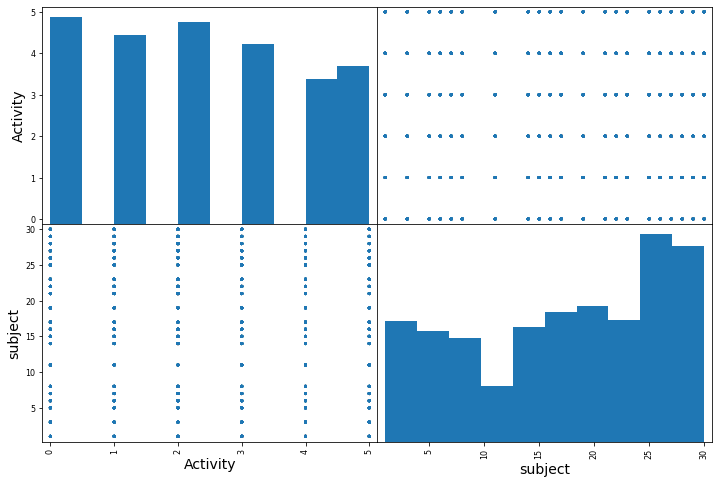

In [10]:
from pandas.plotting import scatter_matrix

attributes = ['Activity', 'subject']
scatter_matrix(train[attributes], figsize = (12,8))

In [11]:
train_X = train.drop(['subject', 'Activity'], axis =1)

In [12]:
train_X

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
4525,0.283203,-0.047024,-0.168986,0.384949,0.176898,-0.310332,0.381757,0.122611,-0.332984,0.465563,...,0.454181,-0.730593,-0.932568,-0.034924,0.558036,0.258975,-0.854858,-0.784330,0.222960,-0.066506
1446,0.256904,-0.036623,-0.133856,0.201409,-0.154142,0.344183,0.092771,-0.182114,0.291899,0.586004,...,0.190745,-0.032958,-0.338095,0.017986,-0.475545,0.942947,-0.567147,-0.665156,0.178975,0.243362
5995,0.291316,-0.001065,-0.072461,-0.336609,-0.279162,-0.303323,-0.381421,-0.253026,-0.337381,0.074430,...,0.299767,-0.351997,-0.698254,-0.044663,-0.551806,-0.680774,0.161405,-0.857202,0.192929,0.046716
4222,0.276116,-0.010909,-0.102886,-0.992196,-0.982169,-0.981127,-0.992838,-0.981366,-0.979864,-0.931924,...,0.335848,-0.623358,-0.906098,-0.177275,-0.309304,0.176515,-0.143818,-0.625215,-0.106678,-0.147469
6754,0.256382,0.000428,-0.113664,0.075014,0.046502,-0.369482,-0.024794,-0.085337,-0.385018,0.562230,...,-0.125979,0.020630,-0.316113,0.347143,0.590475,0.831084,0.465453,-0.860617,0.150598,-0.067109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,0.278897,-0.030306,-0.096043,-0.555352,-0.104055,-0.438064,-0.572530,-0.112149,-0.429688,-0.479744,...,0.022624,0.417731,0.200267,-0.155279,-0.137981,0.929236,-0.583898,-0.703989,0.159112,-0.185944
5226,0.289183,-0.049248,-0.125083,-0.290043,-0.212102,-0.469731,-0.307317,-0.209558,-0.528635,-0.283244,...,-0.039773,-0.021970,-0.360982,-0.019533,-0.896005,-0.039591,0.494178,-0.670139,0.106156,-0.220746
5390,0.293946,-0.018341,-0.119916,-0.627198,-0.216566,-0.424764,-0.648666,-0.253814,-0.417569,-0.547082,...,0.094031,0.527152,0.348736,-0.414621,-0.488542,0.095895,-0.297162,-0.856512,0.183547,-0.034939
860,0.280475,-0.018976,-0.113756,-0.994825,-0.985314,-0.965857,-0.995170,-0.984285,-0.963293,-0.937503,...,0.539885,-0.889671,-0.984051,-0.079515,0.014291,-0.290347,0.602344,-0.839693,0.081388,-0.098270


In [13]:
train_y = train['Activity']
train_y

4525    4
1446    4
5995    3
4222    1
6754    4
       ..
5191    3
5226    4
5390    3
860     2
7270    3
Name: Activity, Length: 7352, dtype: int32

# Train Model

# LogisticRegression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_clf = LogisticRegression(solver="liblinear", random_state=42)

In [15]:
log_clf.fit(train_X, train_y)

LogisticRegression(random_state=42, solver='liblinear')

In [16]:
log_score = cross_val_score(log_clf, train_X, train_y, cv=10, scoring="accuracy")
log_score

array([0.98777174, 0.97690217, 0.98503401, 0.97278912, 0.98231293,
       0.99047619, 0.98639456, 0.9877551 , 0.99183673, 0.98503401])

In [17]:
log_score.mean()

0.9846306566104703

# RandomForest

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rnd_train = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_train.fit(train_X, train_y)

RandomForestClassifier(random_state=42)

In [20]:
rnd_score = cross_val_score(rnd_train, train_X, train_y, cv=10, scoring="accuracy")
rnd_score

array([0.98233696, 0.97826087, 0.98231293, 0.97687075, 0.98095238,
       0.98503401, 0.98367347, 0.98231293, 0.98503401, 0.98503401])

In [21]:
rnd_score.mean()

0.9821822315882877

# ExtraTreesClassifier

In [22]:
from sklearn.ensemble import ExtraTreesClassifier

train_cf = ExtraTreesClassifier()

In [23]:
train_cf.fit(train_X, train_y)

ExtraTreesClassifier()

In [24]:
from sklearn.model_selection import cross_val_score

cross_val_score(train_cf, train_X, train_y, cv=10, scoring="accuracy")

array([0.98913043, 0.98641304, 0.9877551 , 0.98095238, 0.98095238,
       0.9877551 , 0.99047619, 0.98095238, 0.99047619, 0.9877551 ])

In [25]:
np.mean([0.98913043, 0.98641304, 0.9877551 , 0.98095238, 0.98095238,
       0.9877551 , 0.99047619, 0.98095238, 0.99047619, 0.9877551 ])

0.986261829

# SVM

In [26]:
from sklearn.svm import SVC

In [27]:
svm_clf = SVC(kernel="linear", probability=True, random_state=42)
svm_clf.fit(train_X, train_y)

SVC(kernel='linear', probability=True, random_state=42)

In [28]:
svm_score = cross_val_score(svm_clf, train_X, train_y, cv=10, scoring="accuracy")
svm_score

array([0.99320652, 0.98097826, 0.98367347, 0.97278912, 0.99183673,
       0.99319728, 0.98639456, 0.98639456, 0.99183673, 0.98639456])

In [29]:
svm_score.mean()

0.9866701789411417

## SVM이 98.66%로 높음.